In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('default')

In [3]:
df = pd.read_csv('./resources/60min_x1_summary.csv', header=[0], index_col=[0])
df

,noRET_RET,noRET_EM,noRET_SRT,10min_RET,10min_EM,10min_SRT,1h_RET,1h_EM,1h_SRT,6h_RET,6h_EM,6h_SRT
animal,,,,,,,,,,,,
#1,53.333333,27.483333,NaN,70.266667,51.400000,NaN,18.900000,3.050000,16.950000,28.050000,2.766667,31.666667
#2,26.366667,17.216667,NaN,28.350000,0.000000,NaN,30.283333,14.716667,49.166667,42.800000,28.333333,51.666667
#3,70.266667,38.883333,NaN,26.933333,10.000000,NaN,44.150000,6.666667,37.216667,62.216667,19.983333,43.883333
#4,42.783333,35.000000,NaN,72.483333,40.833333,NaN,69.983333,51.950000,68.900000,18.066667,4.983333,5.000000
#5,38.616667,16.383333,NaN,63.633333,67.216667,NaN,67.500000,16.116667,15.833333,48.066667,5.000000,26.400000
#6,39.183333,16.383333,NaN,46.950000,18.883333,NaN,38.600000,7.783333,16.950000,37.216667,10.566667,14.716667
#7,55.566667,36.133333,NaN,35.833333,27.500000,NaN,36.933333,13.600000,27.516667,64.166667,19.733333,53.633333
#8,46.650000,35.566667,NaN,35.283333,36.666667,NaN,67.783333,26.100000,42.783333,32.766667,20.000000,23.616667


In [4]:
pre_1h_ret = df.loc['#5':'#8', '1h_RET']
post_1h_ret  = df.loc['#1':'#4', '1h_RET']

pre_1h_srt = df.loc['#5':'#8', '1h_SRT']
post_1h_srt = df.loc['#1':'#4', '1h_SRT']

pre_diff = pre_1h_ret - pre_1h_srt
post_diff = post_1h_ret - post_1h_srt

In [5]:
pre_diff

animal
#5    51.666667
#6    21.650000
#7     9.416667
#8    25.000000
dtype: float64

In [6]:
post_diff

animal
#1     1.950000
#2   -18.883333
#3     6.933333
#4     1.083333
dtype: float64

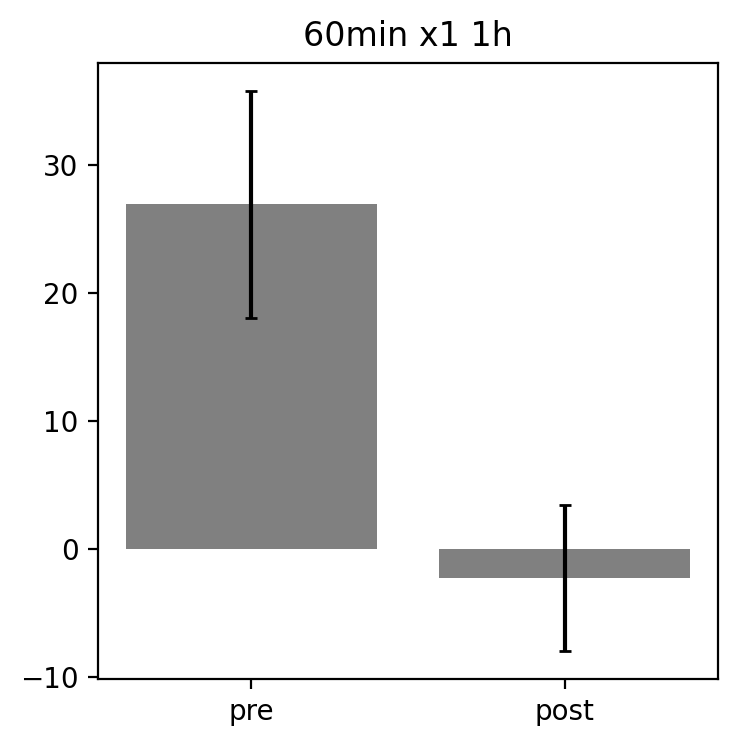

In [7]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
labels = ['pre', 'post']
for index, items in enumerate([pre_diff, post_diff]):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=labels[index], align='center', color='gray')

ax.set_xticks(list(range(2)))
ax.set_title('60min x1 1h')
ax.set_xticklabels(labels=labels)
plt.show()

In [8]:
pre_6h_ret = df.loc['#5':'#8', '6h_RET']
post_6h_ret  = df.loc['#1':'#4', '6h_RET']

pre_6h_srt = df.loc['#5':'#8', '6h_SRT']
post_6h_srt = df.loc['#1':'#4', '6h_SRT']

pre_diff = pre_6h_ret - pre_6h_srt
post_diff = post_6h_ret - post_6h_srt

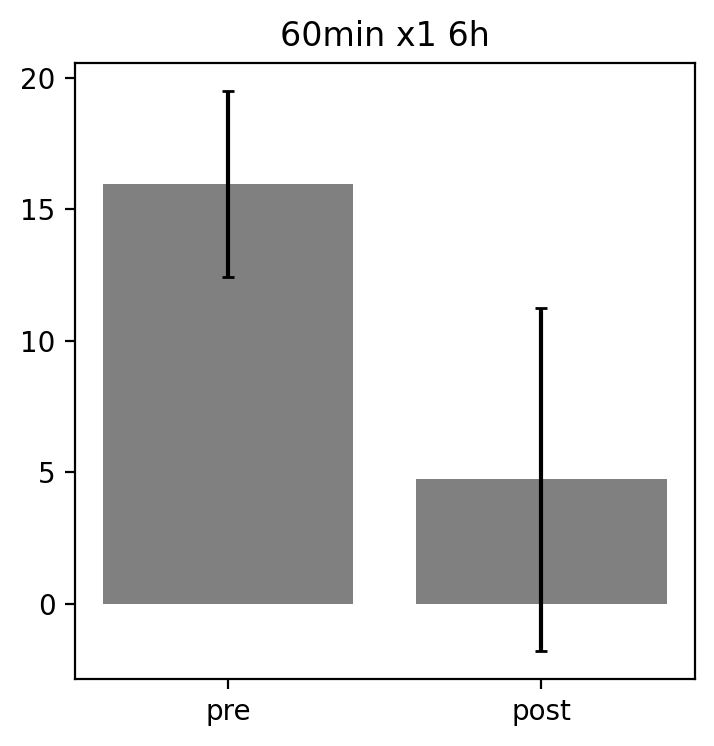

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
labels = ['pre', 'post']
for index, items in enumerate([pre_diff, post_diff]):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=labels[index], align='center', color='gray')

ax.set_xticks(list(range(2)))
ax.set_title('60min x1 6h')
ax.set_xticklabels(labels=labels)
plt.show()